In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import netCDF4 as nc
import datetime as dt
import cmocean
import string
import glob
import pickle
import matplotlib as mpl
from salishsea_tools import evaltools as et
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
from scipy.ndimage import gaussian_filter
from matplotlib.ticker import FormatStrFormatter
from NorthNut import vvl_interp_T_to_V, vvl_interp_T_to_U;

%matplotlib inline

NorthNut defined variables: ig0,ig1,jg0,jg1,fformat0
NorthNut defined variables: vmask, vmask0, umask, umask0, tmask, fmask, gdept,  gdept_1d, e1t, e2t, e12t, e1f, e2f, e1v, e2u, e3t_1d
NorthNut defined variables: boxCol, colL, colR, arrowwidth, headwidth, headlength, alen, toff, apw, apk


calculations have been moved to calcTranspsEstuarineExchange.py

In [2]:
fformat0='%Y%m%d'
mod_start=dt.datetime(2015,1,1)
mod_end=dt.datetime(2015,12,31)
savepath='../../save/transpLines'+mod_start.strftime(fformat0)+'-'+mod_end.strftime(fformat0)+'.pkl'

In [3]:
data=pickle.load(open(savepath,'rb'))
mod_start=data['mod_start']
mod_end=data['mod_end']
volT=data['volT']
no3T=data['no3T']
no3=data['no3']
masks=data['masks']
gdept_1d=data['gdept_1d']
e3t_1d=data['e3t_1d']
ulines=data['ulines']
vlines=data['vlines']

In [4]:
np.shape(no3T['Rosario'])

(8760, 40, 31)

In [5]:
data2=pickle.load(open('../../save/transpLinesAllVars1dFiles20150101-20150131.pkl','rb'))

In [6]:
Tr=data2['Tr']

In [7]:
TrNO3=Tr['nitrate']

In [8]:
np.shape(no3T['Rosario'])

(8760, 40, 31)

In [9]:
nsum=np.sum(np.sum(no3T['Rosario'],2),1)
var=list()
for ii in range(0,int(len(no3T['Rosario'])/24)):
    var.append(np.mean(nsum[ii*24:(ii+1)*24]))
var=np.array(var)

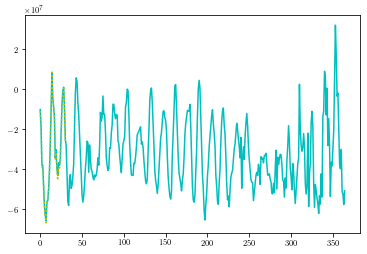

In [10]:
tlist=np.arange(0,8760)/24
plt.plot(var*1e-3*24*3600,'c-')
plt.plot(TrNO3['Rosario'],'y:')

In [13]:
(np.sum(TrNO3['Rosario'][0:30])-np.sum(var[0:30]*1e-3*24*3600))/np.sum(TrNO3['Rosario'][0:30])

0.030986711285904255

In [12]:
np.sum(var[0:30]*1e-3*24*3600)

-903269869.2887348